In [1]:
% pylab inline
import pandas as pd
import numpy as np

import random
random.seed(42)

train = pd.read_csv("data/train.csv")
score = pd.read_csv("data/score.csv")
X_score = score.values[:,2:]
user_id = score.values[:,1]
X = train.values[:,3:]
y = train.values[:,2]

Populating the interactive namespace from numpy and matplotlib


In [2]:
score.head(1)

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,5,29,1,36,23.785714,0.764706,9,0,9246,...,1,0,152,0,0,0,0,81,1,0.0


In [3]:
X_score

array([[ 29.,   1.,  36., ...,  81.,   1.,   0.],
       [ 22.,   1.,   2., ...,  79.,   0.,   0.],
       [ 22.,   0.,   9., ...,  62.,   1.,   0.],
       ..., 
       [ 21.,   0.,   6., ...,  23.,   1.,   0.],
       [ 21.,   1.,  17., ...,  29.,   0.,   0.],
       [ 18.,   1.,   8., ...,  13.,   0.,   0.]])

In [4]:
score.describe()

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86681.000000,8.668100e+04,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,...,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86680.000000
mean,43341.000000,8.568399e+05,24.012621,0.625108,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,...,0.108617,-0.020350,932.254704,4.471534,0.133143,0.002457,1.171052,44.202293,0.353676,0.000265
std,25022.793679,4.941988e+05,6.393003,0.484098,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,...,0.927222,0.568315,2763.441203,37.940155,7.466784,0.172407,22.990162,19.730629,0.478113,0.034804
min,1.000000,5.000000e+00,8.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,-30.000000,-14.000000,-104540.000000,-2230.000000,-9.000000,-8.000000,-423.000000,0.000000,0.000000,-1.000000
25%,21671.000000,4.279080e+05,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.000000,8.561090e+05,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,65011.000000,1.287271e+06,26.000000,1.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,...,0.000000,0.000000,897.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86681.000000,1.708981e+06,79.000000,1.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,...,56.000000,41.000000,112577.000000,4728.000000,1496.000000,33.000000,3272.000000,112.000000,1.000000,1.000000


In [5]:
train.head(1)

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,10,0,24,0,20,26.333333,0.777778,6,0,...,0,0,54,0,0,0,0,79,0,0


In [6]:
train.describe()

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,43341.500000,8.547774e+05,0.017766,23.993067,0.622217,18.988521,24.068308,0.617246,4.040147,0.434935,...,0.105847,-0.021054,942.677188,4.716723,0.279158,0.002757,0.954500,44.350061,0.352045,0.000242
std,25023.082354,4.938304e+05,0.132101,6.388225,0.484836,57.934430,5.127068,0.318587,5.843532,1.853233,...,0.843507,0.534960,2856.036359,155.648950,43.782235,0.177153,19.209259,19.707058,0.477611,0.034803
min,1.000000,1.000000e+01,0.000000,8.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,-29.000000,-18.000000,-135022.000000,-951.000000,-264.000000,-5.000000,-2752.000000,0.000000,0.000000,-1.000000
25%,21671.250000,4.279675e+05,0.000000,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.500000,8.520060e+05,0.000000,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000
75%,65011.750000,1.282592e+06,0.000000,26.000000,1.000000,18.000000,26.157895,0.900000,4.000000,0.000000,...,0.000000,0.000000,913.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86682.000000,1.708942e+06,1.000000,79.000000,1.000000,6437.000000,77.000000,1.000000,122.000000,225.000000,...,41.000000,19.000000,217876.000000,44900.000000,12702.000000,20.000000,2036.000000,112.000000,1.000000,1.000000


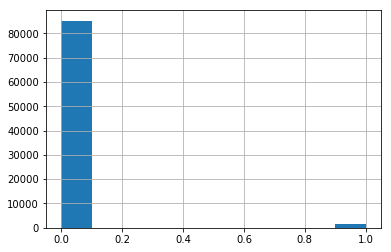

In [7]:
train.adopter.hist()

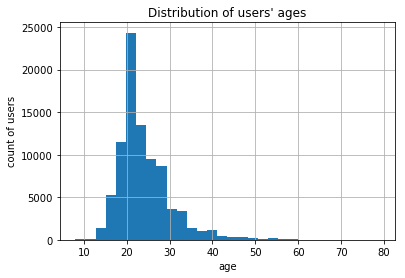

In [8]:
train.age.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

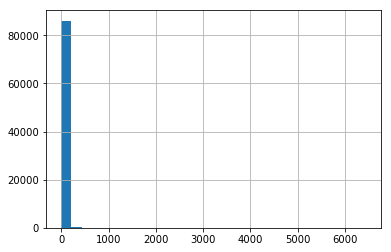

In [9]:
train.friend_count.hist(bins=30)

(array([ 30800.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1540.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

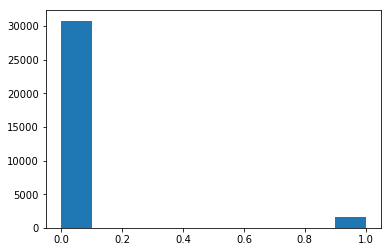

In [10]:
from imblearn.under_sampling import RandomUnderSampler

s = RandomUnderSampler(.05)
X_sampled, y_sampled = s.fit_sample(X, y)
plt.hist(y_sampled)

In [11]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled
)

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y
#)

In [12]:
from sklearn.preprocessing import RobustScaler
from scipy import stats
# Scale data
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
data = pd.DataFrame(data=X_train)
data.columns = train.columns[3:]
data.describe()

,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,...,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000
mean,0.167842,-0.373366,0.807272,0.203762,-0.105579,0.539662,0.476397,0.464344,0.995872,7.220367,...,0.113544,-0.027541,0.974297,4.327809,0.187384,0.002020,0.988044,-0.020769,0.349083,0.000124
std,1.062009,0.483708,4.399459,0.952060,0.679591,1.529456,1.959685,1.283444,3.246060,206.090934,...,0.826633,0.564603,2.901036,31.440572,11.511230,0.193156,13.365612,0.676889,0.476690,0.039058
min,-2.500000,-1.000000,-0.375000,-2.397541,-1.430108,-0.500000,0.000000,-0.358291,-0.197368,0.000000,...,-19.000000,-18.000000,-136.939148,-943.000000,-1.000000,-5.000000,-451.000000,-1.517241,0.000000,-1.000000
25%,-0.500000,-1.000000,-0.250000,-0.405738,-0.510753,-0.250000,0.000000,-0.294803,-0.184211,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.517241,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.750000,0.594262,0.489247,0.750000,0.000000,0.705197,0.815789,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.482759,1.000000,0.000000
max,8.666667,0.000000,401.875000,9.405738,0.715054,30.000000,92.000000,27.983900,112.723684,23452.000000,...,26.000000,11.000000,144.317444,1421.000000,1618.000000,20.000000,716.000000,2.172414,1.000000,1.000000


In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support, classification_report
import csv

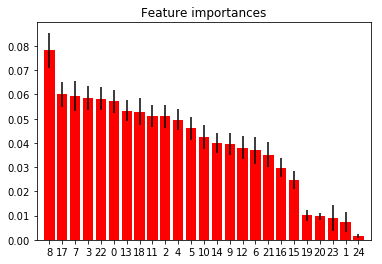

Precision:0.108033240997 Recall:0.204188481675, FScore:0.141304347826
[[7059  644]
 [ 304   78]]


In [14]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=45, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = forest.predict(X_test)
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

In [15]:
arr = forest.feature_importances_
top_features = arr.argsort()[-20:][::-1]
train_top_features = map(lambda x: x+3, top_features)
score_top_features = map(lambda x: x+2, top_features)

print train_top_features
print score_top_features

X_score = score.values[:,score_top_features]

[11, 20, 10, 6, 25, 3, 16, 21, 14, 5, 7, 8, 13, 17, 12, 15, 9, 24, 19, 18]
[10, 19, 9, 5, 24, 2, 15, 20, 13, 4, 6, 7, 12, 16, 11, 14, 8, 23, 18, 17]


In [16]:
data2 = pd.DataFrame(data=X_score)
data2.columns = train.columns[train_top_features]
data2.describe()

,loved_tracks,delta_songs_listened,songs_listened,avg_friend_age,tenure,age,delta_avg_friend_age,delta_loved_tracks,shouts,friend_count,avg_friend_male,friend_country_cnt,playlists,delta_avg_friend_male,posts,delta_friend_cnt,subscriber_friend_cnt,delta_shouts,delta_subscriber_friend_cnt,delta_friend_country_cnt
count,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000
mean,92.552266,932.254704,18057.370012,24.059611,44.202293,24.012621,0.270479,4.471534,31.698319,19.330049,0.617691,4.073292,0.555508,-0.000243,5.521175,0.896932,0.440939,1.171052,-0.020350,0.108617
std,379.560208,2763.441203,29152.584389,5.104065,19.730629,6.393003,0.719881,37.940155,193.717694,73.992293,0.318366,5.913118,1.038202,0.050965,80.306180,8.923235,1.966933,22.990162,0.568315,0.927222
min,0.000000,-104540.000000,0.000000,8.000000,0.000000,8.000000,-48.833333,-2230.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-211.000000,0.000000,-423.000000,-14.000000,-30.000000
25%,1.000000,0.000000,1306.000000,20.750000,29.000000,20.000000,0.000000,0.000000,1.000000,3.000000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,7640.000000,23.000000,44.000000,23.000000,0.244444,0.000000,4.000000,7.000000,0.666667,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,897.000000,23327.000000,26.153846,59.000000,26.000000,0.447205,0.000000,15.000000,19.000000,0.900000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59328.000000,112577.000000,899816.000000,79.000000,112.000000,79.000000,28.000000,4728.000000,20608.000000,10868.000000,1.000000,138.000000,90.000000,1.000000,11245.000000,880.000000,181.000000,3272.000000,41.000000,56.000000


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=45)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("random_forest")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0722891566265 Recall:0.282722513089, FScore:0.115138592751
[[6317 1386]
 [ 274  108]]


In [18]:
from sklearn.ensemble import ExtraTreesClassifier

model = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=45)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("extra_trees")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0973741794311 Recall:0.232984293194, FScore:0.137345679012
[[6878  825]
 [ 293   89]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("k_neighbors")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.2 Recall:0.00261780104712, FScore:0.00516795865633
[[7699    4]
 [ 381    1]]


In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("discriminant_analysis")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d.0,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0505655355955 Recall:0.994764397906, FScore:0.0962390781309
[[ 568 7135]
 [   2  380]]


In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("naive_bayes")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d.0,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0472538347353 Recall:1.0, FScore:0.0902433262462
[[   1 7702]
 [   0  382]]


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

model = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("gaussian_process")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d.0,%d\n" % (user_id[i],prediction))
        i += 1

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("ada_boost")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d.0,%d\n" % (user_id[i],prediction))
        i += 1